In [2]:
import pandas as pd

def get_category_combinations(csv_file):
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Group by category and subcategory to get unique combinations
    combinations = df.groupby(['category', 'sub_category']).size().reset_index()
    
    # Drop the size column (we only want category combinations)
    combinations = combinations[['category', 'sub_category']]
    
    return combinations

# Example usage
if __name__ == "__main__":
    # Replace 'your_file.csv' with your actual CSV file path
    csv_file = 'train.csv'
    
    try:
        result = get_category_combinations(csv_file)
        print("Unique category combinations:")
        print(result)
    except FileNotFoundError:
        print("CSV file not found")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

Unique category combinations:
                                          category  \
0                            Any Other Cyber Crime   
1                             Cryptocurrency Crime   
2                   Cyber Attack/ Dependent Crimes   
3                   Cyber Attack/ Dependent Crimes   
4                   Cyber Attack/ Dependent Crimes   
5                   Cyber Attack/ Dependent Crimes   
6                   Cyber Attack/ Dependent Crimes   
7                   Cyber Attack/ Dependent Crimes   
8                   Cyber Attack/ Dependent Crimes   
9                                  Cyber Terrorism   
10  Hacking  Damage to computercomputer system etc   
11  Hacking  Damage to computercomputer system etc   
12  Hacking  Damage to computercomputer system etc   
13  Hacking  Damage to computercomputer system etc   
14  Hacking  Damage to computercomputer system etc   
15                        Online Cyber Trafficking   
16                          Online Financial Fraud  

In [1]:
import pandas as pd
import numpy as np

def extract_empty_subcategories(input_file, output_file):
    # Read the original CSV file
    df = pd.read_csv(input_file)
    
    # Find rows where sub_category is empty
    # This checks for NaN, None, empty strings, and whitespace
    empty_subcategory = df[
        df['sub_category'].isna() | 
        (df['sub_category'].astype(str).str.strip() == '')
    ]
    
    # Save the filtered rows to a new CSV file
    empty_subcategory.to_csv(output_file, index=False)
    
    # Print summary statistics
    print(f"Total rows in original file: {len(df)}")
    print(f"Rows with empty subcategories: {len(empty_subcategory)}")
    print(f"Percentage of empty subcategories: {(len(empty_subcategory)/len(df))*100:.2f}%")

if __name__ == "__main__":
    try:
        # Replace these with your actual file paths
        input_file = 'train.csv'
        output_file = 'empty_subcategories.csv'
        
        extract_empty_subcategories(input_file, output_file)
        print(f"\nEmpty subcategory rows have been saved to: {output_file}")
        
    except FileNotFoundError:
        print("Input CSV file not found!")
    except PermissionError:
        print("Permission denied when writing output file!")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

Total rows in original file: 93686
Rows with empty subcategories: 6591
Percentage of empty subcategories: 7.04%

Empty subcategory rows have been saved to: empty_subcategories.csv


Total rows with empty subcategories: 6591
Number of unique categories: 4

Category Distribution:
                                                    Count  Percentage
category                                                             
RapeGang Rape RGRSexually Abusive Content            2822       42.82
Sexually Obscene material                            1838       27.89
Sexually Explicit Act                                1552       23.55
Child Pornography CPChild Sexual Abuse Material...    379        5.75


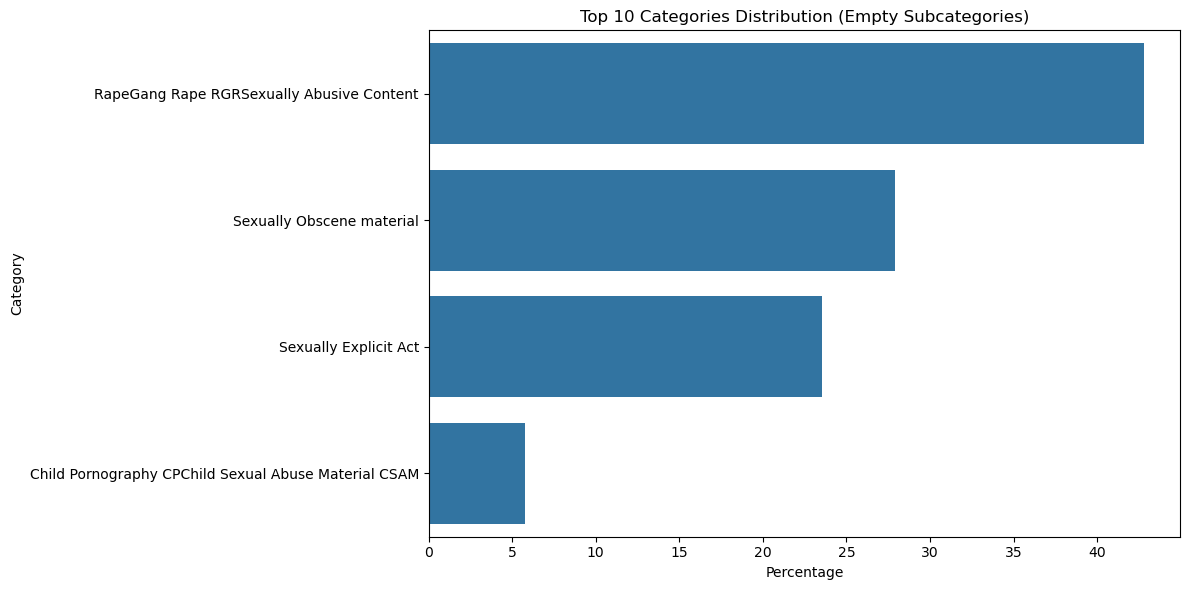


Descriptive Statistics for Category Frequencies:
count       4.000000
mean     1647.750000
std      1005.642871
min       379.000000
25%      1258.750000
50%      1695.000000
75%      2084.000000
max      2822.000000
Name: count, dtype: float64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_empty_subcategories(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Calculate category metrics
    total_rows = len(df)
    category_counts = df['category'].value_counts()
    category_percentages = (category_counts / total_rows * 100).round(2)
    unique_categories = df['category'].nunique()
    
    # Create a summary DataFrame
    summary_df = pd.DataFrame({
        'Count': category_counts,
        'Percentage': category_percentages
    })
    
    # Sort by percentage in descending order
    summary_df = summary_df.sort_values('Percentage', ascending=False)
    
    # Print metrics
    print(f"Total rows with empty subcategories: {total_rows}")
    print(f"Number of unique categories: {unique_categories}")
    print("\nCategory Distribution:")
    print(summary_df)
    
    # Create a visualization
    plt.figure(figsize=(12, 6))
    sns.barplot(x=category_percentages.values[:10], 
                y=category_percentages.index[:10])
    plt.title('Top 10 Categories Distribution (Empty Subcategories)')
    plt.xlabel('Percentage')
    plt.ylabel('Category')
    plt.tight_layout()
    plt.show()

    # Additional statistics
    print("\nDescriptive Statistics for Category Frequencies:")
    print(category_counts.describe())

if __name__ == "__main__":
    try:
        file_path = 'empty_subcategories.csv'
        analyze_empty_subcategories(file_path)
        
    except FileNotFoundError:
        print("CSV file not found!")
    except Exception as e:
        print(f"An error occurred: {str(e)}")